In [1]:
import numpy as np
import random

In [2]:
nchan = 7
Nst = 100

In [38]:
import os, sys
strunctfiledir='/Users/huifangwang/MULANa/RatCon/'

strunctfile=strunctfiledir+'bams_grid_80.csv'

csvMat = np.genfromtxt (strunctfile, delimiter=",")




In [7]:
infile = open(strunctfile, 'r')  # CSV file
import csv
table = []
for row in csv.reader(infile):
    table.append(row)
infile.close()

In [33]:
arealists=['ECT','ENTl','ENTm','ENTmv','POST','PAR','PRE','SUBd', 'SUBv', 'CA1','CA2','CA3','DG','IG']

In [34]:
tablelist=table[0][1:]

In [35]:
areaindex=[tablelist.index(iarea) for iarea in arealists]

In [40]:
Nchannel=csvMat.shape[0]-1

In [41]:
sMat_raw=csvMat[1:,1:]

sMat_raw[sMat_raw==1]=0
sMat_log=np.log10((sMat_raw+0.00001)*10)
   
sMat_norm=sMat_log/sMat_log.max()
sMat_norm[sMat_norm<0]=0
chosed_sMat=sMat_norm[areaindex][:,areaindex]
Nchannel=chosed_sMat.shape[0]

In [43]:
AllMat=[]

# This would print all the files and directories

for istur in np.arange(Nst):
    chan_ch=random.sample(set(range(Nchannel)), nchan)    
    if np.shape(AllMat)[0]<1:
        AllMat = np.expand_dims(chosed_sMat[chan_ch][:,chan_ch],axis=2)
    else:
        AllMat = np.concatenate([AllMat,np.expand_dims(chosed_sMat[chan_ch][:,chan_ch],axis=2)],axis=2)

In [44]:
AllMat[:,:,3]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.81978602,  0.81978602],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.97382492,
         1.        ,  0.90989298],
       [ 0.        ,  0.90989298,  0.        ,  0.75585416,  0.        ,
         0.75585416,  0.90989298],
       [ 0.        ,  0.97382492,  0.66574739,  1.        ,  0.        ,
         0.        ,  0.75585416],
       [ 0.        ,  0.90989298,  0.66574739,  0.81978602,  0.66574739,
         0.81978602,  0.        ]])

In [45]:
import matplotlib.pyplot as plt

In [46]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


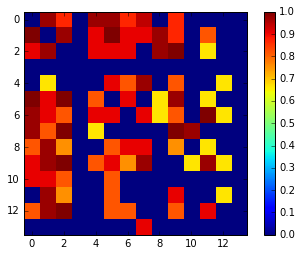

In [48]:
plt.imshow(chosed_sMat[:,:],interpolation='nearest')
plt.colorbar()


In [49]:
import scipy.io
filename = strunctfiledir + 'stru100RconN'+str(nchan)+'.mat'
a={'sMat': AllMat}

scipy.io.savemat(filename,a)

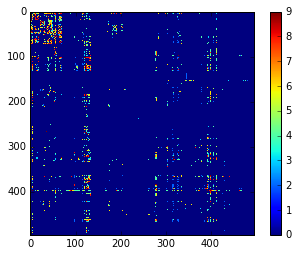

In [50]:
plt.imshow(sMat_raw[:,:],interpolation='nearest')
plt.colorbar()
    

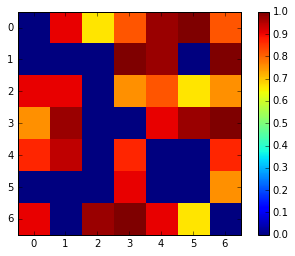

In [52]:
plt.imshow(AllMat[:,:,7],interpolation='nearest')
plt.colorbar()


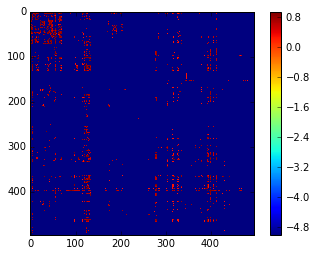

In [40]:
plt.imshow(sMat_log[:,:],interpolation='nearest')
plt.colorbar()

3037

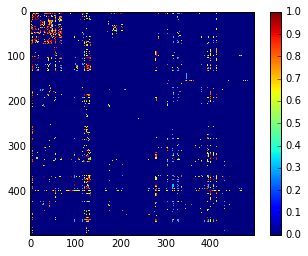

In [43]:
plt.imshow(sMat_norm[:,:],interpolation='nearest')
plt.colorbar()
np.sum(sMat_norm>0.8)